## Project - Background Subtraction In Street Road

Implementing Background Subtraction in a dynamic dataset for a street road project is to accurately detect and extract foreground objects or entities in an street images, thereby facilitating robust and real-time monitoring of the street environment.

## Objective

* Import Libraries and Define Auxiliary Functions
* Dynamic Background Modeling

  Incorporate mechanisms for dynamically updating the background model to account for gradual environmental changes
* Integration with Road Infrastructure

  Integrate the background subtraction module seamlessly with other components of the street road project, such as traffic signal control   systems or automated surveillance systems.
* Anomaly Detection

# Datasets

Download and unzip the datasets:

In [ ]:

await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/peds.tar.gz")

# Import requird libraries

Install SymPy for printing matrices

In [1]:
!conda install -c anaconda sympy -y

Retrieving notices: ...working... done
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - sympy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.08.22 |       h06a4308_0         130 KB  anaconda
    certifi-2022.12.7          |   py37h06a4308_0         152 KB  anaconda
    gmpy2-2.1.2                |   py37heeb90bb_0         209 KB  anaconda
    mpc-1.1.0                  |       h10f8cd9_1          94 KB  anaconda
    mpfr-4.0.2                 |       hb69a4c5_1         653 KB  anaconda
    mpmath-1.2.1               |   py37h06a4308_0         958 KB  anaconda
    openssl-1.1.1w          

In [2]:
import pandas as pd
import numpy as np 


from os import listdir,getcwd
from os.path import isfile, join
from random import randint
from PIL import Image


In [3]:
import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline


In [4]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing th

In [5]:
from sympy import Matrix, init_printing,Symbol
from numpy.linalg import qr,eig,inv,matrix_rank,inv,svd
init_printing()

## Background Model using SVD

Background subtraction is a widely used approach to detect moving objects in a sequence of frames from static cameras. The base in this approach is detecting moving objects from the differences between the current frame and reference frame, which is often called 'Background Image' or 'Background Model'.

Define Helper function 

In [7]:
def get_data_Matrix (mypath="peds"):
    cwd = getcwd()

    mypath=join(cwd,mypath)
    files = [ join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f)) and f.startswith(".")==False]
    # Read image
    img = Image.open(files[0])
    I=np.array(img)
    # Output Images

    Length,Width=I.shape
   
    X=np.zeros((len(files),Length*Width))
    for i,file in enumerate(files):
        img = Image.open(file)
        I=np.array(img)
        X[i,:]=I.reshape(1,-1)
    return X,Length,Width

In [12]:
X,Length,Width=get_data_Matrix(mypath="peds")

There are 170 images in the dataset and each is  152×232
  (32654 pixels)

In [13]:
X.shape, Length , Width

Let's Plot five random images from matrix

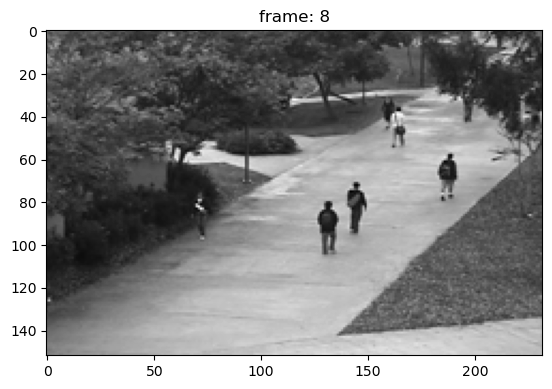

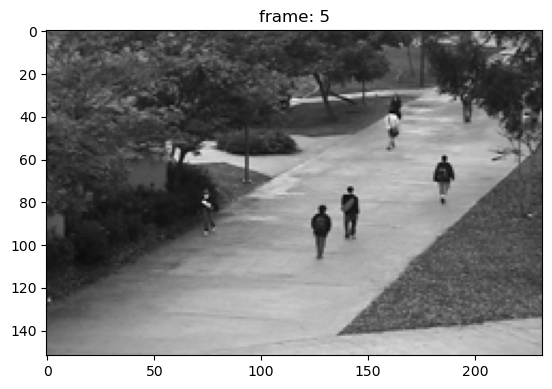

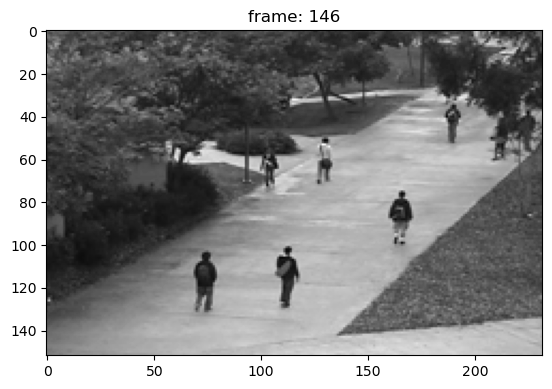

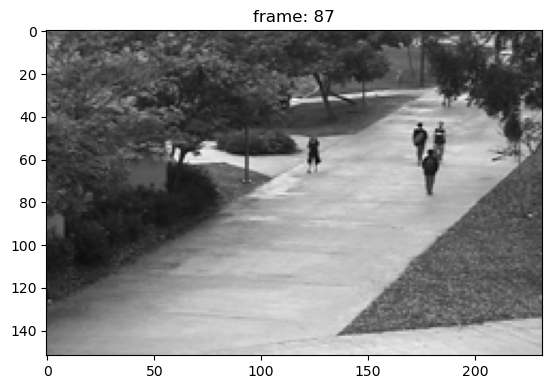

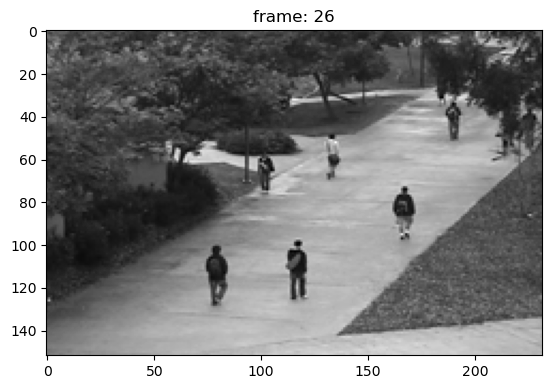

In [14]:
for i in range(5):
    frame=randint(0, X.shape[0]-1)
    plt.imshow(X[randint(0, X.shape[0]-1),:].reshape(Length,Width),cmap="gray")
    plt.title("frame: "+str(frame))
    plt.show()

We Perform SVD(Single Value Decomposition) on the image

In [15]:
U, s, VT =svd(X, full_matrices=False)

In [16]:
S=np.diag(s)

We can reconstruct the image using Truncated SVD with L=1 and assign the result to to Xhat"

In [17]:
L=1
Xhat=U[:,:L]@S[0:L,0:L]@VT[:L,:]

If we plot the first image, we will see the pedestrians are gone

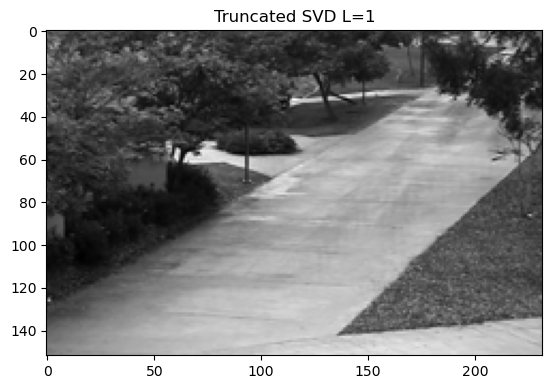

In [18]:
plt.imshow(Xhat[0,:].reshape(Length,Width),cmap="gray")
plt.title('Truncated SVD L=1')
plt.show()

Reshape five random images

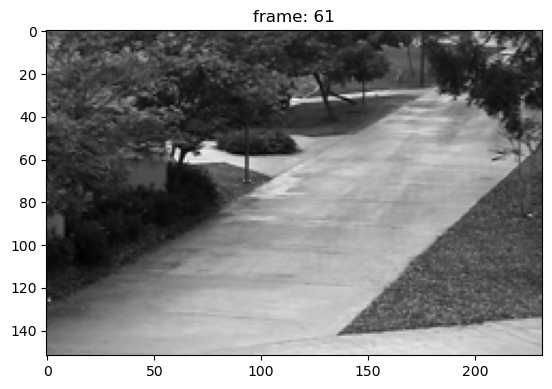

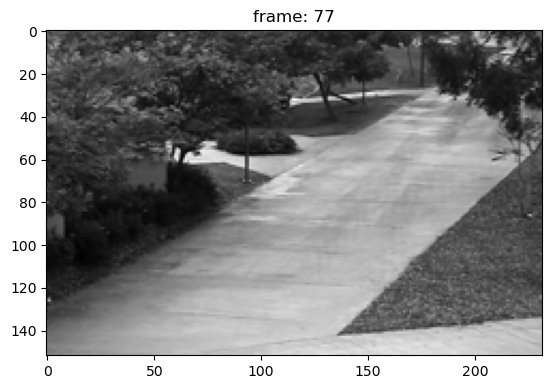

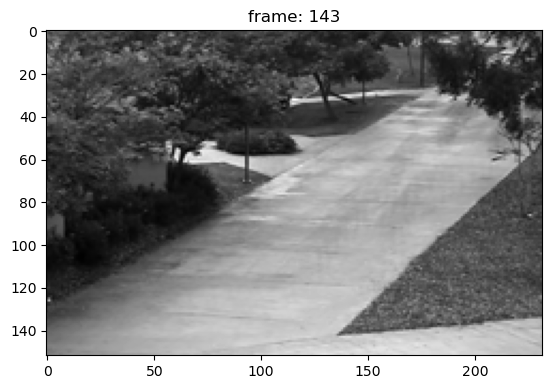

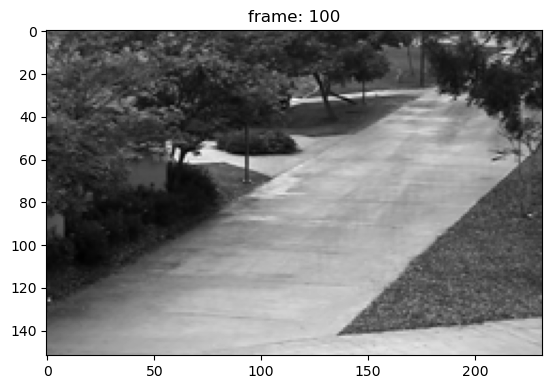

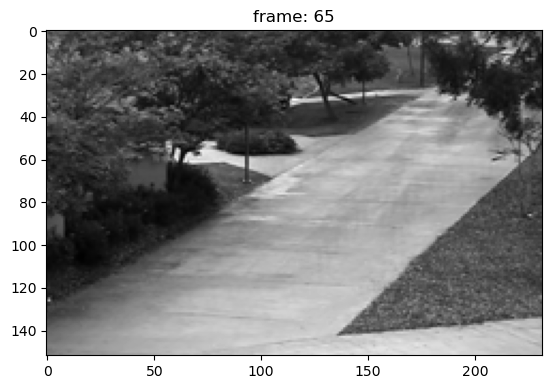

In [19]:
for i in range(5):
    frame=randint(0, X.shape[0]-1)
    plt.imshow(Xhat[randint(0, X.shape[0]-1),:].reshape(Length,Width),cmap="gray")
    plt.title("frame: "+str(frame))
    plt.show()

Cumulative explained variance against the number of singular values  𝐿

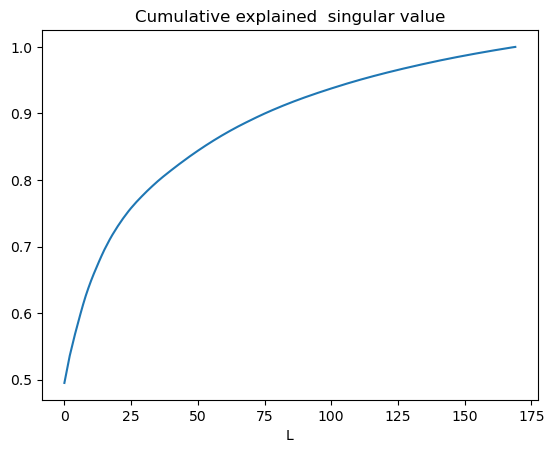

In [20]:
plt.plot(np.cumsum(s)/s.sum())
plt.xlabel('L')
plt.title('Cumulative explained  singular value')
plt.show()

If we increase the value of L the pedistrain does not remove clearly

In [21]:
L=10
Xhat=U[:,:L]@S[0:L,0:L]@VT[:L,:]

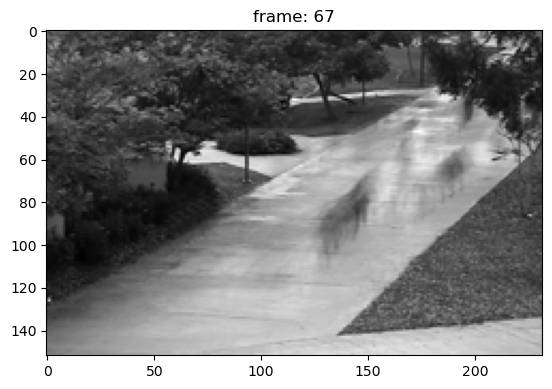

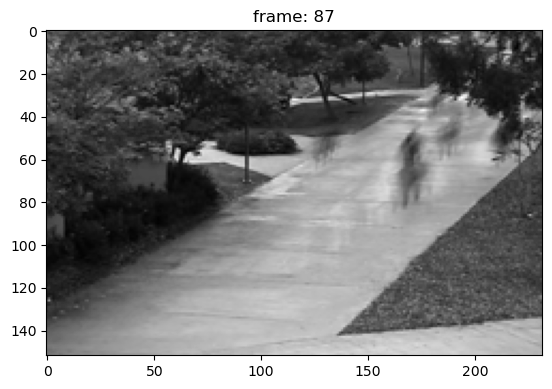

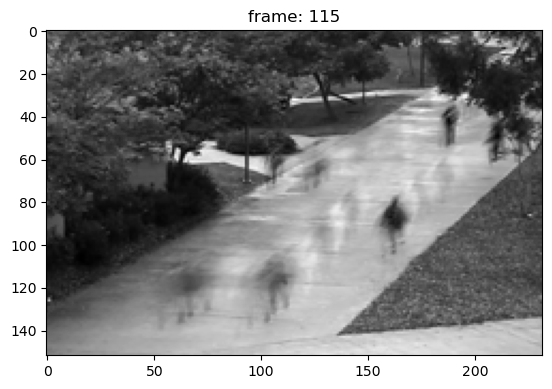

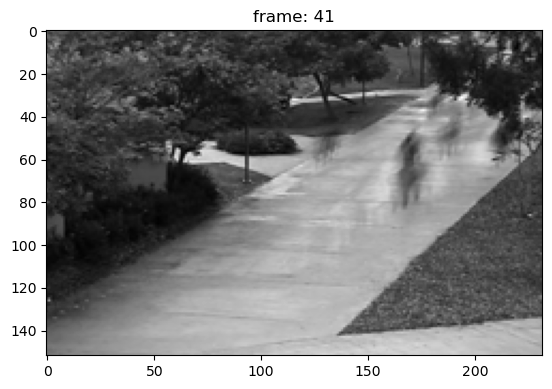

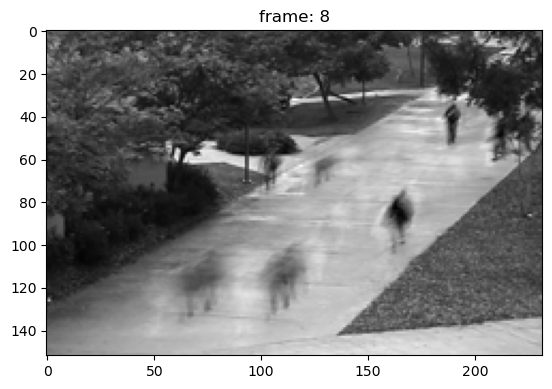

In [22]:
for i in range(5):
    frame=randint(0, X.shape[0]-1)
    plt.imshow(Xhat[randint(0, X.shape[0]-1),:].reshape(Length,Width),cmap="gray")
    plt.title("frame: "+str(frame))
    plt.show()